In [3]:
using Plots, FileIO, Images, Plots.PlotMeasures

In [4]:
using JLD

In [5]:
const deg = 3 # deg(f)

3

In [6]:
const q=128

128

In [7]:
setprecision(BigFloat, 2048)

2048

In [8]:
parameters = load("g128-128.jld")
const δ0 = parameters["δ"]
const b0 = parameters["b"]
const x0 = parameters["x"]

-0.251683313281249400969750637255665066988387103659034188074211163316355387540779570417635003657708654660893631228490109397498725757541743582229750750327333888883407191015232815019432962317663676739656257980988251353680041330638781216793112090504765544742994707516600982684121136847403732816650168692955046871930762572963433237478877332874827990587708304726249954445626227909035043215370058868846126123749605478921322063511687902526661387659317516833499974837357735918892054923757891685138211516170808490002867660665610180505566954548065317787700129493193389888868992739216962535257770561356588617154161578535689339872389 + 0.19183060940357502944527384503501675930709294159834444343513446555728682480083016029386055073920697665545949227455764173269559928347600494342563796313782991525270055682270376960275545430004828885407011437228101515657976135658911463901556303397465593142452189828650422708842052525423385222555073706033083989415476975567577561542734805322983439878333429090012804026484627652310

In [9]:
const α0 = 1/BigFloat(q)+δ0^q
const λ0 = exp(2*BigFloat(pi)*im*α0)

0.998795666931147259982850344270874054353487228494275765775755152035999394384176855537658566404392528918702184903676937789135674826826106282715739807692858278883884296106226465631376947407912630285852013620357078125163125570389288148426532951536648880324972090439192843220420689437520519587679518116398409119787142814873825877984883738305526592403060669243060078034465064459441073573708000485288044101241917415363429499156383111602993297507013340417472109691167049248082059067320943594634309266062489318283500538879331920590569935106625300344778613863375483769815792035369747615003950732572368925276666478300120652463368 + 0.049064693479233714781060588507522949613589633634541594594672628790241935363734447318451502128339029775330416559645049575343198907845404442514130396485575290657111943671072546346621982946058548057404205908496216977620687397079563165914399009482249267433930424360451948937335764716055866805341363640369171972531527060725663481657124225426632873534182146500589539965883808084969

In [10]:
typeof(λ0)

Complex{BigFloat}

In [11]:
const δ0f = ComplexF64(δ0)
const b0f = ComplexF64(b0)
const x0f = ComplexF64(x0)
const α0f = ComplexF64(α0)
const λ0f = ComplexF64(λ0)

0.9987956669311473 + 0.049064693479233715im

In [12]:
f(z) = λ0f * z * (1 + z * (b0f + z))
f_B(z) = λ0 * z * (1 + z * (b0 + z))

f_B (generic function with 1 method)

In [13]:
const ω0 = -(b0-sqrt(b0^2-3))/3
const ω1 = -(b0+sqrt(b0^2-3))/3

-0.762620014951318368259973977864679301771789390085543939078843006901714314030942157484855603776808743871526974451997781636351447295703293062205115183313579599247710032273534573630825781912845357871877854290865604568861214764085219373583171635381333350502093464476599411050412051003976589386879821069376083474949427871540200957783520836186573823002998874176997254649829088194074368815761948530064817105765257538825234186115760352485492262905370621548709321871119294233671156926143760383816882863541085590598331083019017489584145205314263474166836272396494379858665131253360012542185651866495261057041903878474012073951725 - 0.14423088058519260697327962069424455467188202952388361256946046762754695761336471490883828411847034446018033758238555563649016724346574814681982183396014692503112986301288152599020541134400228994248014981194220556222133997221055286181186815173485173495249509101167125951199531139375918008832915148590609540993867347360337940506723709779203730264997924420919202888577280522004

In [14]:
const ω0f = ComplexF64(ω0)
const ω1f = ComplexF64(ω1)

-0.7626200149513184 - 0.1442308805851926im

In [15]:
function fn(n,z)
    for i=1:n
        z=f(z)
    end
    return z
end

function fn_B(n,z)
    for i=1:n
        z=f_B(z)
    end
    return z
end


fn_B (generic function with 1 method)

In [16]:
f_B(ω1)

-0.185681668914548686554449621747025474045412543987156864394037070057738266761274230287825809230236905469794247801416097163496086473049959871286467739346490921731268216032561625257872803460416958764682304563133366166748624209187524101508182036763373060340227142903590956243868321429743597788962922812096646130555617887016344686396930348829555206503829010400072014607891454807356070748100031736721512361415179040875586451999649917180937862355666348376968798117942939433792301036561767270968821821760654468736018596317153958027140119083802698455552572511561770231699687032567842834062499730401964733281361790441356463171828 + 0.04315063770101967507802402360985037148839094121192652067362657814933834301465523352981718923865110946831261189421672017917802298428287801441537127907196642475167718625853896835308031149737015243423206542502010289785552168510670590451032467995375551005453055854243642197334678121582626369061996656806658789294398328889450026955899788861566753837687818632682829984858834366638

In [17]:
df(z) = λ0f * (z * (2 * b0f + 3 * z) + 1)
df_B(z) = λ0 * (z * (2 * b0 + 3 * z) + 1)

df_B (generic function with 1 method)

In [18]:
function fdf(z)
    return f(z), df(z)
end
function fdf_B(z)
    return f_B(z), df_B(z)
end
    
    

fdf_B (generic function with 1 method)

In [19]:
const fp = -b0/2+sqrt(((b0^2-4)*λ0+4)*λ0)/(2*λ0)

-0.00175111462311401070102019966573306826579869852028807220229500026402861569599545107014871172131797976651378854447555234703235128963228152998099015248593468559260527241719847667008541863871210093720707222498896222081900520017815046692547853172351096283197390923337592393733441703824605372665390881692837491844161955707818300948917214392843623403122398337963283566771925211469410743506567568937434522331561120443656450908323462489733228397251234590537448181989975116149559822299956788185473395595801991299454619581726704020276036634829831696537128608902374743354706148525377549322423131488704665101134848832432207199866645 - 0.027571271465550013571913335025117559982562679592400790610743181929331977111141092756297266068951538374313683099673972262184241126877234622389794805749212601145425282214262357018151459634259191595309129759051955547964014700133035933922938530227041239490067050994500660764958825440651761307227301016174589583469576176241150918712729493827691737250780782404405205640467416786

In [20]:
const fpf = ComplexF64(fp)

-0.0017511146231140107 - 0.027571271465550013im

In [21]:
f_B(fp)-fp

-3.62618677427645891657833988668499748503033941861519810072745913072307191174753513448400735924561694756239231006883024814710549209528303707051449418141257788107741532142731687928570818576636373580581946974103994007663969035997101750814247743740560722468370101764019697590083943842159810607310263746639799587836078799653431322010060271172500597778433267786362950995224279191003330725883410804088278935018950820970626507572997523625041305278868963833461100973523926979884964878156350475695720152909220996876695198800754868604298354611656041731739649731655864692115890288878348630714593598224177136986197082820052234603306e-619 + 9.6698313980705571108755730311599932934142384496405282686065576819281917646600936919573529579883118601663794935168806617256146455874214321880386511504335410162064408571395116780952218287103032954821852526427731735377058409599227133550466064997482859324898693803738586024022385024575949495282736999103946556756287679907581685869349405646000159407582204743030120265393141117

In [22]:
tau0(z) = z/(z-fpf)
tau0_B(z) = z/(z-fp)

tau0_B (generic function with 1 method)

In [23]:
tau0inv(w) = fpf*w/(w-1)
tau0inv_B(w) = fp*w/(w-1)

tau0inv_B (generic function with 1 method)

In [24]:
tau0(x0)

0.949264357982156787717632970812107637684850118152246543002373017580769448753139193011934440511196069854649137758776391347125704634166789418570880128798215560577610404884571525939013727535336075663264604535488655919257472504625718100209161680996067168826007673863224674665585844533519028548315084913258568157821997449569520954680430586406768245402264658394754545776305703373905432001668803379431143625055580501883378288779101341927828450094176904384191376359638187380238549278490075765848114607068647587029045562300567544132158463267017418028645766926946175684824642597557624962751843911106274420488199963314719552528245 + 0.065776943779138321286203227323262980812423358501590573649492588346810388489031157603359203872750642732126686395817621469698617527768547021949542790750867128644720858336962966908463973380833910371676751162955680700107916813612934912772310030834281719673622133760071128977541624642823112884547673210270019949241786235416070596283150599289329996007452447558336300808374581961529

In [25]:
# eps must be greater than tan(2π/q)/2
function IsTau1Defined(z; eps = 4/q)
    w = tau0(z)
    return (real(w)<0) && ((abs(imag(w))/(-real(w))) < eps)
end

function IsTau1Defined_B(z; eps = 4/q)
    w = tau0_B(z)
    return (real(w)<0) && ((abs(imag(w))/(-real(w))) < eps)
end

IsTau1Defined_B (generic function with 1 method)

↓Note that it can be an infinite loop.

In [26]:
function send_to_dom_tau1(z; eps = 1/q)
    n = 0
    while (!IsTau1Defined(z))
        z = f(z)
        n += 1
    end
    return n, z
end

function send_to_dom_tau1_B(z; eps = 1/q)
    n = 0
    while (!IsTau1Defined_B(z))
        z = f_B(z)
        n += 1
    end
    return n, z
end

send_to_dom_tau1_B (generic function with 1 method)

In [27]:
n_x0, xn = send_to_dom_tau1_B(x0)

(60, -0.000951086957386142240067520036080088120254578601707310630519317776223881913512081446366844822289323355176139966111917012778992121714889556557736935309437715526842964204477265142480450602509139302686993454682078443068988056649013317184927353869023580962626859532708107545405687966998487923755733883186390187953597162618495681011192338962453170937490824144569021140643476468851437287013368388280086009877065604432393503142125832339899128514222163074489465634837958399190071022567929205826893356079436565183012290263462647747401688146374221346691341512908327097962100001645163483245848541850155335611419118623706751703039438 - 0.013229990115818675467794021458330988981733487137016775290778990044851515137290985458636930410298751459461146527892247948912823392336574064846107027016670318667890228784007606397577013728571512734664942654375183963329806428508551819877323827376454199848777398902248325412452769695826431816065149666031346858752281543468217534724880388485763959428534919798786514332188

In [28]:
# pre-Fatou coordinate of xn
ComplexF64(1/(2*BigFloat(pi)*im*α0)*log(tau0(xn)))

63.677148690429945 + 1.6224354938706187im

In [29]:
const w_x0 = exp(-1/(α0)*log(tau0(xn)))

-11818.6874919723008906454042173922622553895226155963892156398912110975044417678586126716692929238433065579169356685921850185702451931282329081786606870169745479466334951458083229664308941546879261746530506394012331746998866049780427818258536757513805575448494502376928872639982600308237059900429020231731623548164901666814282891931695766206503386307967372300688381989375341526811874701208129220816960371502613938663024171467639447216202982415336865858633139165386544610620957450133879307415462096712908765214492062319503381375559957362722325727657888510262396869177366760109987142694106101288802021085559254260791302443 + 23990.75830331261510320484457728852331496945882559179833573748283218413979376179965879241130597164799345224521536459667019936032162270172059353936640456085668833716007222815114241219762999701646570798755094620980317364968628723217683714272793045309411382508691301983991966692649923553375041165162316109773191836900476235410550884059805206223303992843734208149033675272243792389

In [30]:
const w_x0f = ComplexF64(w_x0)

-11818.687491972301 + 23990.758303312614im

In [31]:
function tau1_from_tau0(z)
    w = exp(-1/(α0f)*log(z))
    return (w-w_x0f)/w
end

function tau1_from_tau0_B(z)
    w = exp(-1/(α0)*log(z))
    return (w-w_x0)/w
end

tau1_from_tau0_B (generic function with 1 method)

In [32]:
function tau1fn(z; eps = 1/q)
    n, w = send_to_dom_tau1(z; eps = eps)
    return n, tau1_from_tau0(tau0(w))
end

function tau1fn_B(z; eps = 1/q)
    n, w = send_to_dom_tau1_B(z; eps = eps)
    return n, tau1_from_tau0_B(tau0_B(w))
end

tau1fn_B (generic function with 1 method)

In [33]:
# using n_x0 is not essential (anything close to q/2 should work)
const k0=q*q*10000+q*n_x0

163847680

↓ Takes around 17min

In [ ]:
z = ω0
for i=1:k0
    z = f_B(z)
end
const ω_n0 = z

In [229]:
n, w = tau1fn_B(omega_n0)
const n0 = k0 + n
const θ0 = angle(w)

0.00470450348071201227533417579011278067739476975188740904274718966491361829578314211287931212234062577842509350879410631803110343072969811965597831729380892525295907167289034778132184774730645915165894149021269313063818350261586475750872568361129477164187531395611578243290411860469413685585527098467308772825619987964909083523219103264999732281970721396061446512292398727857922457367144842947287408575589499332511206998613590711463832539072471736893922516567757625506997492066474742281078326453025839972300783891130750595460257800091371258577242307806260740623871086116988616574523485831721653941192895265894085578088016

In [230]:
n0

163847740

In [231]:
w

0.472346356746477782139215282679723258282369062692460683293099789102621876718122925575916749771152678903782111884961635799805742652498609660676490417878736832477054563359528670796068932267553840907867581196306267964945702602919310692664170382194247975463692126473634921043008455291915869850278060997309761950991889065520620899307064925354433933891519735260967223659904648066086575619265992248509725706420192869692276520330980692972298753566716177125150409686404886788948515185252110049168348291807045988442436562955540303998097543347354463470828695692233275400926294889617134043985086942700542966845002863703443145128027 + 0.002222171473400790423467491389729024570089427221941336605289949687866825438583287676315965727858148960234748033704924396991529185501914745504036684960293179726839571152167643113724657137869023819006967218785478695912938910471960576879080041051960008494613104792794865322748253235513406110229659222387445538351606503552021374192907643887505481018940600142742833414705721029419

In [232]:
# 不用意に間違って上書きしないようコメントアウト
#save("theta128-128.jld", "omega_n0", ω_n0, "theta", θ0, "n", n0)

In [35]:
data = load("theta128-128.jld")
const ω_n0 = data["omega_n0"]
const θ0 = data["theta"]
const n0 = data["n"]

163847740

In [36]:
function isEscaping(z,R2)
    if (abs2(z)>R2)
        return true, log(k)
    end
    return false, -1
end
        

isEscaping (generic function with 1 method)

In [37]:
# for small iterations (dz = (f^k)'(z)/deg^k
function isEscaping_Green(k, z, dz, R2, minmetric)
    l = abs2(z)
    if (l>R2) # escaping case
        g=log(l)/(2*deg^k)
        dg = abs(dz)/abs(z)
        return true, (dg/sinh(g)>minmetric) ? -100 : -50
    end
    return false, -1
end

isEscaping_Green (generic function with 1 method)

In [38]:
# for large iterations (dz = (f^k)'(z) )
function isEscaping_Green2(z, dz, R2, minmetric)
    l = abs2(z)

    if (l>R2) # escaping case
        g = log(l)/2
        dg = abs(dz)/abs(z)
        metric = dg/g; # deg^k sinh(g/deg^k) is close to g when k is large
        return true, (metric>minmetric) ? -100 : -50
    end
    return false, -1
end

isEscaping_Green2 (generic function with 1 method)

In [39]:
# assuming IsTau1Defined(z) is true
function inAttrPetal(z, eps2, angle0, eta)
    w = tau1_from_tau0(tau0(z))
    l2 = abs2(w)
    if (l2 < eps2) # near the parabolic periodic point
        θ = (angle(w)-angle0)/(2*pi) * q
        #if (abs(theta-round(theta))<eta) # in the petals (seems not working properly for large q)
        if (true && (abs(θ)<eta)) # in the (specific) petal
            p = round(θ)
            return true, p
        end
    end
    return false, -1
end

function inAttrPetal_B(z, eps2, angle0, eta)
    w = tau1_from_tau0_B(tau0_B(z))
    l2 = abs2(w)
    if (l2 < eps2) # near the parabolic periodic point
        θ = (angle(w)-angle0)/(2*pi) * q
        #if (abs(theta-round(theta))<eta) # in the petals (seems not working properly for large q)
        if (true && (abs(θ)<eta)) # in the (specific) petal
            p = round(θ)
            return true, p
        end
    end
    return false, -1
end

inAttrPetal_B (generic function with 1 method)

In [40]:
function Julia(xmin, xmax, ymin, ymax, width, height; maxiter = 100, R = 10)
    R2 = R^2
    xrange = range(xmin, xmax, length=width)
    yrange = range(ymin, ymax, length=height)

    zrange = complex.(xrange', yrange)

    function iter(z)
        for k=1:maxiter
            z = f(z)
            if (abs2(z)>R2)
                return log(k)
            end
        end
        return -1
    end

    mesh = map(iter, zrange);

    return xrange, yrange, mesh
end


Julia (generic function with 1 method)

In [26]:
xrange, yrange, mesh = Julia(-2.25,0.75,-1.5,1.5,800,800, maxiter=1000)

(-2.25:0.0037546933667083854:0.75, -1.5:0.0037546933667083854:1.5, Real[0.0 0.0 … 0.6931471805599453 0.6931471805599453; 0.0 0.0 … 0.6931471805599453 0.6931471805599453; … ; 0.0 0.0 … 0.6931471805599453 0.6931471805599453; 0.0 0.0 … 0.6931471805599453 0.6931471805599453])

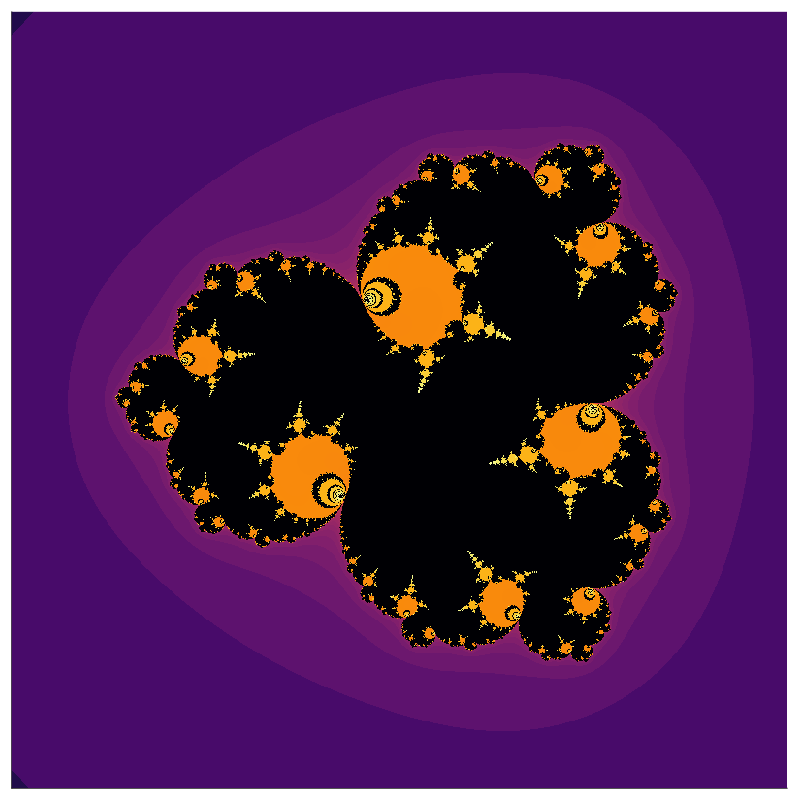

In [27]:
heatmap(xrange, yrange, mesh, size=(800,800), colorbar=false, ticks=false, frame=false)

## Computing attracting petal

In [41]:
tau0_B(fn_B(64,x0)), tau0_B(fn_B(64,ω0))

(-0.90567979196079332422853354456630508214833880237139714117624546499818747790086436502408077997881666871123196138489755031296975641439396244726089850556249332211754566534172802253633616048500481236387074720487375632090365471869100387712579641996114812637065770969458287366396043960460786562522012677185963636547236684266532018746557838066725625121607688093829593466564551140516533165364851673064209870368869229229349642857034489147117869150848758340449338000631151174968470367397469234115343413791547006139179441633365055918324420745848667595396501469023843213819984388897907919687226653302893261853794765093742842030412 - 0.16478724776794799993263500751750612131588773783040011665702095697858182460028840347929361610445047456300680878449141686986395634671603426766361827231186772075968283096488164113598759584632592012780554833322962799715744501524701862551915776128526195058693611359437864236174465697473001008044109501045618484715118614287056738071097938900734447585617721834865045348717204914417

In [42]:
function Julia_by_Green(xmin, xmax, ymin, ymax, width, height; maxiter1 = 30, maxiter2=500, minmetric = 10000, R = 100, eps = 0.001, eta=0.4)
    R2 = R^2
    eps2 = eps^2


    xrange = range(xmin, xmax, length=width)
    yrange = range(ymin, ymax, length=height)

    zrange = complex.(xrange', yrange)

    # compute hyperbolic metric in the escape region
    function iter(z) 
        dz = 1

        # fast escaping case
        for k=1:maxiter1
            z, t = fdf(z)
            dz *= t/deg # dz = (f^k)'(z)/deg^k indeed

            escaping, nearJ = isEscaping_Green(k, z, dz, R2, minmetric)
            
            if (escaping)
                return nearJ;
            end

            if (IsTau1Defined(z))
                inAttr, p = inAttrPetal(z, eps2, θ0, eta)

                if (inAttr)
                    #return ((p-k+maxiter2) % q);
                    j= (n0 - (k-p*q)) % (q*q);
                    return (j==0) ? 50 : 0
                end
            end
        end

        # slow escaping (=not so expanding) case
        dz *= deg^maxiter1; 

        for k=(maxiter1+1):maxiter2
            z, t = fdf(z)
            dz *= t

            escaping, nearJ = isEscaping_Green2(z, dz, R2, minmetric)
            
            if (escaping)
                return nearJ;
            end

            if (IsTau1Defined(z))
                inAttr, p = inAttrPetal(z, eps2, θ0, eta)

                if (inAttr)
                    #return ((p-k+maxiter2) % q);
                    j= (n0 - (k-p*q)) % (q*q);
                    return (j==0) ? 50 : 0
                end
            end

        end

        return -150
    end

    mesh = map(iter, zrange);

    return xrange, yrange, mesh
end

Julia_by_Green (generic function with 1 method)

In [43]:
function Julia_by_Green_B(xmin, xmax, ymin, ymax, width, height; maxiter1 = 30, maxiter2=500, minmetric = 10000, R = 100, eps = 0.001, eta=0.4, prec=256)

    origprec = precision(BigFloat)
    setprecision(BigFloat, prec)

    R2 = R^2
    eps2 = eps^2


    xrange = range(xmin, xmax, length=width)
    yrange = range(ymin, ymax, length=height)

    zrange = complex.(xrange', yrange)

    # compute hyperbolic metric in the escape region
    function iter(z) 
        dz = 1

        # fast escaping case
        for k=1:maxiter1
            z, t = fdf(z)
            dz *= t/deg # dz = (f^k)'(z)/deg^k indeed

            escaping, nearJ = isEscaping_Green(k, z, dz, R2, minmetric)
            
            if (escaping)
                return nearJ;
            end

            if (IsTau1Defined_B(z))
                inAttr, p = inAttrPetal_B(z, eps2, θ0, eta)

                if (inAttr)
                    #return ((p-k+maxiter2) % q);
                    j= (n0 - (k-p*q)) % (q*q);
                    return (j==0) ? 50 : 0
                end
            end
        end

        # slow escaping (=not so expanding) case
        dz *= deg^maxiter1; 

        for k=(maxiter1+1):maxiter2
            z, t = fdf(z)
            dz *= t

            escaping, nearJ = isEscaping_Green2(z, dz, R2, minmetric)
            
            if (escaping)
                return nearJ;
            end

            if (IsTau1Defined_B(z))
                inAttr, p = inAttrPetal_B(z, eps2, θ0, eta)

                if (inAttr)
                    #return ((p-k+maxiter2) % q);
                    j= (n0 - (k-p*q)) % (q*q);
                    return (j==0) ? 50 : 0
                end
            end

        end

        return -150
    end

    mesh = map(iter, zrange)

    setprecision(BigFloat, origprec)

    return xrange, yrange, mesh
end

Julia_by_Green_B (generic function with 1 method)

In [ ]:
xrange, yrange, mesh = Julia_by_Green(-2.25,0.75,-1.5,1.5,2048,2048, minmetric=200, maxiter1=30, maxiter2=1000* q*q, eps=0.48, eta=0.25)

In [98]:
fig = heatmap(xrange, yrange, mesh, size=(2048,2048), colorbar=false, ticks=false, frame=false, margins=-2mm)

UndefVarError: UndefVarError: `xrange` not defined

In [48]:
savefig("out128-128-2048x2048_50000.png")

"/Users/inou/Documents/jupyter/JuliaJulia/out128-2048x2048_50000.png"

In [49]:
save("out128-128-2048x2048_50000.jld", "xrange", xrange, "yrange", yrange, "mesh", mesh);

In [109]:
xrange2, yrange2, mesh2 = Julia_by_Green(-2.25,0.75,-1.5,1.5,800,800, minmetric=100, maxiter1=30, maxiter2=1000*128*128, eps=0.48, eta=0.25)
#xrange2, yrange2, mesh2 = Julia_by_Green_B(-2.25,0.75,-1.5,1.5,400,400, minmetric=100, maxiter1=30, maxiter2=128*128, eps=0.95, eta=0.4)

(-2.25:0.0037546933667083854:0.75, -1.5:0.0037546933667083854:1.5, [-50 -50 … -50 -50; -50 -50 … -50 -50; … ; -50 -50 … -50 -50; -50 -50 … -50 -50])

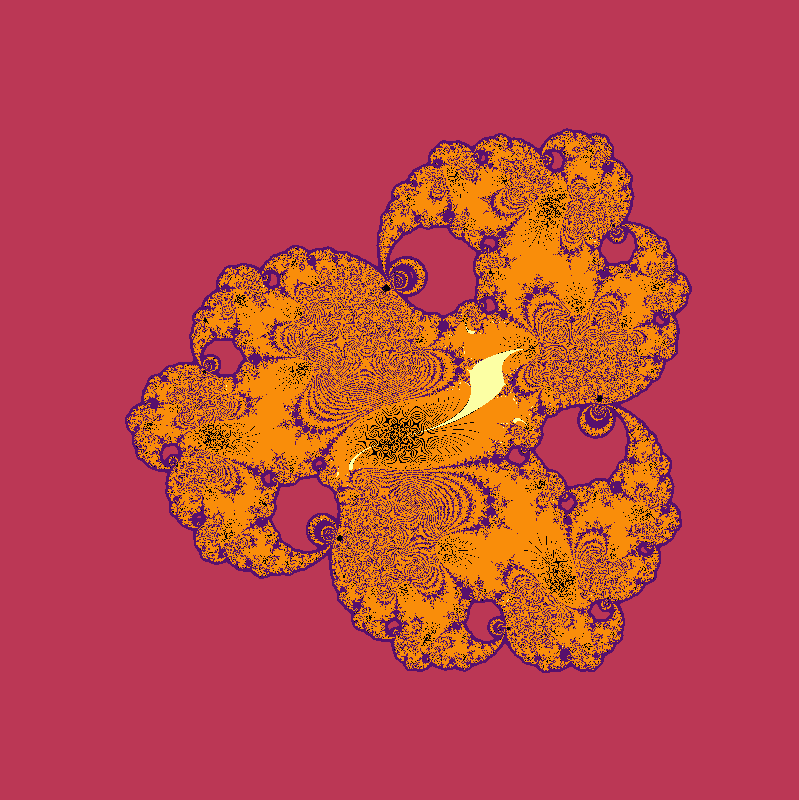

In [112]:
heatmap(xrange2, yrange2, mesh2, size=(800,800), margins=-2mm, ticks=false, frame=false, colorbar=false)

In [113]:
savefig("out128-128-800x800_16384000.png")

"/Users/inou/Documents/jupyter/JuliaJulia/out128-128-800x800_16384000.png"

In [44]:
c=ComplexF64(x0)
r=0.2
xrange3, yrange3, mesh3 = Julia_by_Green(real(c)-r,real(c)+r,imag(c)-r,imag(c)+r,400,400, minmetric=100, maxiter1=30, maxiter2=1000*128*128, eps=0.48, eta=0.25)
#xrange3, yrange3, mesh3 = Julia_by_Green_B(real(x0)-0.1,real(x0)+0.1,imag(x0)-0.1,imag(x0)+0.1,400,400, minmetric=100, maxiter1=30, maxiter2=128*128, eps=0.95, eta=0.1) 

(-0.4516833132812494:0.0010025062656641604:-0.051683313281249366, -0.008169390596424991:0.0010025062656641606:0.39183060940357506, [50 50 … -100 0; 50 50 … 0 -150; … ; 0 0 … 0 0; 0 0 … 0 0])

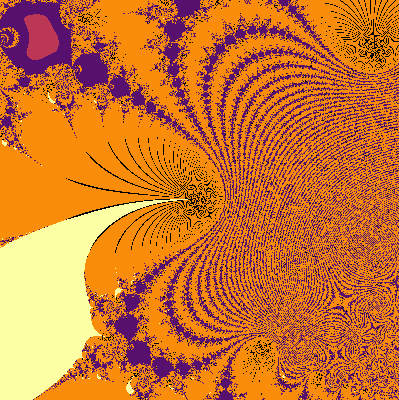

In [47]:
heatmap(xrange3, yrange3, mesh3, size=(400,400), margins=-2mm, ticks=false, frame=false, colorbar=false)

In [48]:
savefig("out128-128-400x400_16384000-nearx0.png")

"/Users/inou/Documents/jupyter/JuliaJulia/out128-128-400x400_16384000-nearx0.png"

In [159]:
tau1_from_tau0_B(tau0_B(tau0x0))

8.42878337284592774104941460286315672893956138502342120385035585338311266992927496433659224153696492231296504856921182211753239161361655858523694258705253712239397767698661422051846646985884910189810714502823464918072055626783205817876306595904882502130403821070116484526708227961597637739980875905932761576298519556770437753586977717747611647232970553866515855752973586741757633453103227058284363327276063710219455423185746332438448987615778560054180373564616814252600973968113771725646876406813679002369743943973601095346614980763438789218020066785317035935671400282910385651330426676995945083931855054372133120741977e+237 - 2.34411706519259923543669470463030750906537683708250936266407803553061211473741449137329112818077876093400043374682109877930772651011083658212317683373826926627816888225808418845836210364736996081636431759999203782261110083780865694006043006182420319404803648682305353688563852667800549476799682324341081999213631817385217929846870843856936366043445392047954398980623937796

In [183]:
xrange3, yrange3, mesh3 = NearX0(-2.25,0.75,-1.5,1.5,2048,2048)

(-2.25:0.0014655593551538837:0.75, -1.5:0.0014655593551538837:1.5, [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

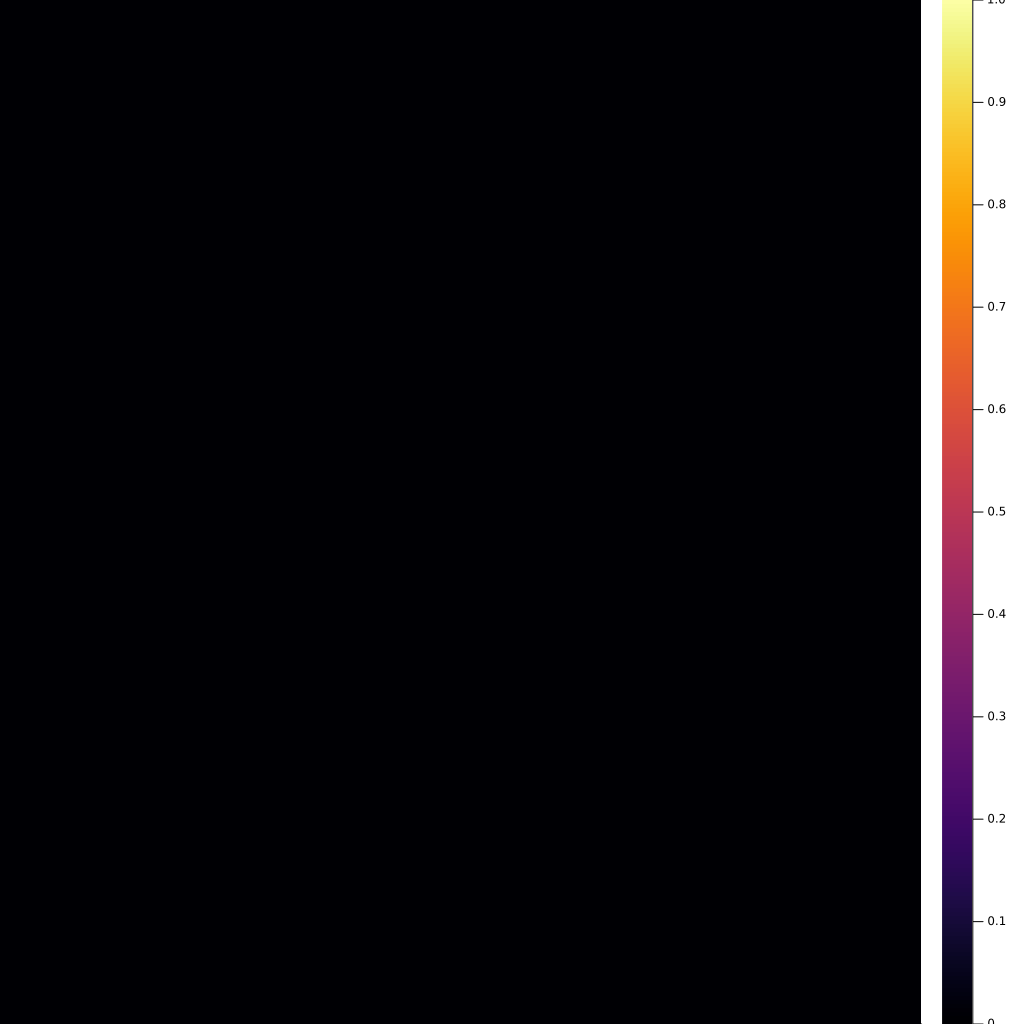

In [184]:
heatmap(xrange3, yrange3, mesh3, size=(1024,1024), margins=-2mm, ticks=false, frame=false)

In [ ]:
function Find(δ, b, x0)
    v = [δ, b]
    x = x0
    for i=1:20
        h, x = H(v[1], v[2], x)
        v -= dH(v[1],v[2],x)\h
    end
    return v, x
end

Find (generic function with 1 method)